# GLASS DATASET
Using the above dataset to build a K Nearest Neighbors Model to predict the type of glass.

## BUSINESS OBJECTIVE
* Maximize Accurate prediction
* Minimize Errors

## CONSTRAINTS
* Incorrect entry


## DATA DICTIONARY

| **slno** | **Name of Feature** | **Description**                                         | **Type** | **Relevance** |
|:--------:|:--------------------|:--------------------------------------------------------|:--------:|:-------------:|
| 1        | RI                  | Refractive Index                                        | Ratio    | Relevant      |
| 2        | Na                  | Sodium                                                  | Ratio    | Relevant      |
| 3        | Mg                  | Magnesium                                               | Ratio    | Relevant      |
| 4        | Al                  | Aluminium                                               | Ratio    | Relevant      |
| 5        | Si                  | Silicon                                                 | Ratio    | Relevant      |
| 6        | K                   | Potassium                                               | Ratio    | Relevant      |
| 7        | Ca                  | Calcium                                                 | Ratio    | Relevant      |
| 8        | Ba                  | Barium                                                  | Ratio    | Relevant      |
| 9        | Fe                  | Iron                                                    | Ratio    | Relevant      |
| 10       | type                | Dependent Variable: Types of Glass varying from 1 to 7  | Nominal  | Relevant      |

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from termcolor import colored
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:
df0 = pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass15\glass.csv")
df=df0.copy()
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### EXPLORATORY DATA ANALYSIS & FEATURE ENGINEERING

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [3]:
df.shape

(214, 10)

In [4]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Checking the Number of Duplicates in the Dataset.

In [7]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  1


Removing the duplicate row

In [8]:
df.drop_duplicates(keep='first',inplace=True)

Checking the Number and Percentage of Missing Values in the Dataset.

In [9]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [10]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64


In [11]:
df['Type'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

### First Moment Business Decision or Measures of Central Tendency.
* It gives the mean, median and mode values of the dataset.
* Mean is the average of the data and it easily gets influenced by the outliers.
* Median is the middle most value of the dataset.
* Mode is the most repeated value of the dataset.
* If the mean, median & mode are same then the data has normal distribution otherwise the distribution is not normal.

In [12]:
df.mean()

RI       1.518348
Na      13.404085
Mg       2.679202
Al       1.449484
Si      72.655070
K        0.498873
Ca       8.954085
Ba       0.175869
Fe       0.057277
Type     2.788732
dtype: float64

In [13]:
df.median()

RI       1.51768
Na      13.30000
Mg       3.48000
Al       1.36000
Si      72.79000
K        0.56000
Ca       8.60000
Ba       0.00000
Fe       0.00000
Type     2.00000
dtype: float64

In [14]:
stats.mode(df)

C:\Users\lenny\AppData\Local\Temp\ipykernel_30616\4235401754.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(df)


ModeResult(mode=array([[ 1.5159, 13.    ,  0.    ,  1.54  , 72.86  ,  0.    ,  8.03  ,
         0.    ,  0.    ,  2.    ]]), count=array([[  3,   5,  42,   8,   4,  30,   5, 175, 143,  76]]))

### Second Moment Business Decision or Measures of Dispersion
* It contains Variance, Standard Deviation & Range.
* It gives a general idea about the spread of data in the dataset.
* Variance is the average squared distance of each data point from the mean.
* Standard deviation is the root of the variance.
* Range is the difference between the max and min data point of the dataset.

In [15]:
df.var()

RI      0.000009
Na      0.666937
Mg      2.084244
Al      0.245942
Si      0.599073
K       0.426651
Ca      2.033138
Ba      0.248248
Fe      0.009524
Type    4.431571
dtype: float64

In [16]:
df.std()

RI      0.003033
Na      0.816662
Mg      1.443691
Al      0.495925
Si      0.773998
K       0.653185
Ca      1.425882
Ba      0.498245
Fe      0.097589
Type    2.105130
dtype: float64

In [17]:
Range=df.max()-df.min()
Range

RI       0.02278
Na       6.65000
Mg       4.49000
Al       3.21000
Si       5.60000
K        6.21000
Ca      10.76000
Ba       3.15000
Fe       0.51000
Type     6.00000
dtype: float64

### THIRD MOMENT BUSINESS DECISION OR SKEWNESS
* Skewness gives the measure of asymmetry in a data.
* The types of skewness are as follows:
    * Negative skewness or left skewed.
    * Positive skewness or right skewed.
    * If skewness = 0 then it is normally distributed.

In [18]:
df.skew()

RI      1.648017
Na      0.465699
Mg     -1.146096
Al      0.938402
Si     -0.744646
K       6.545429
Ca      2.050752
Ba      3.406749
Fe      1.747173
Type    1.108861
dtype: float64

### FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [19]:
df.kurt()

RI       5.038907
Na       3.083933
Mg      -0.426338
Al       2.116563
Si       3.021864
K       54.542640
Ca       6.671054
Ba      12.464936
Fe       2.634023
Type    -0.294177
dtype: float64

### GRAPHICAL REPRESENTATION

Plotting histograms of each variable.

C:\Users\lenny\AppData\Local\Temp\ipykernel_30616\522995607.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


<function matplotlib.pyplot.show(close=None, block=None)>

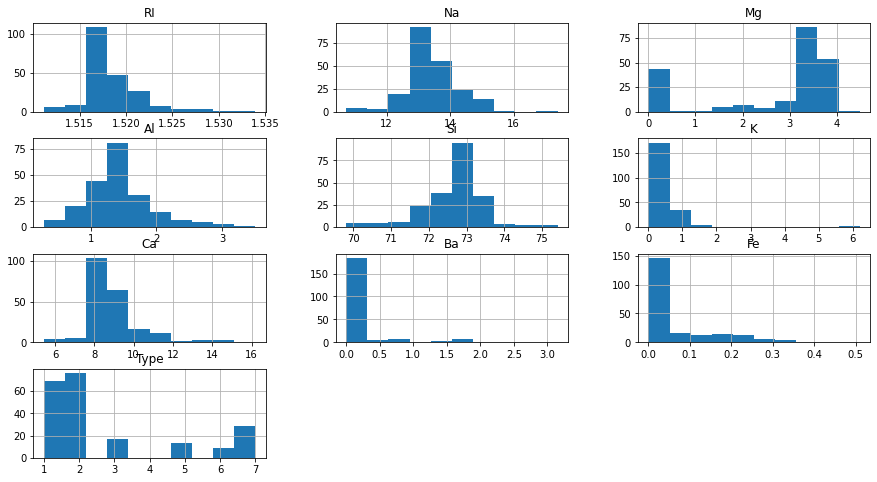

In [20]:
fig=plt.figure(figsize=(15,8))
ax=fig.gca()
df.hist(ax=ax)
plt.show

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


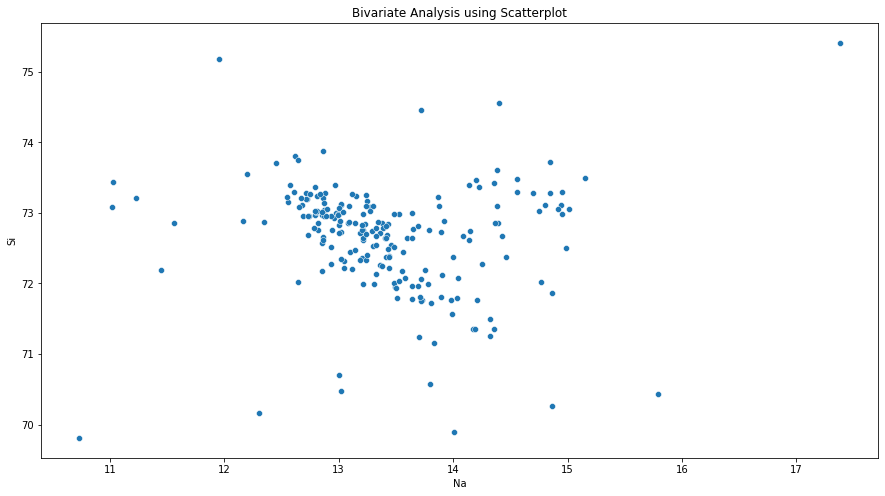

In [21]:
plt.figure(figsize=(15,8))
sns.scatterplot(df.Na,df['Si'])
plt.title("Bivariate Analysis using Scatterplot")
plt.show()

Plotting boxplots of each variable.

In [22]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RI'>

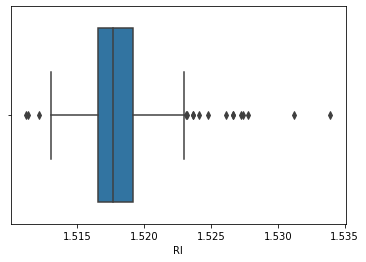

In [23]:
sns.boxplot(df["RI"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Na'>

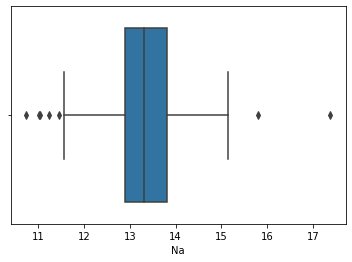

In [24]:
sns.boxplot(df['Na'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mg'>

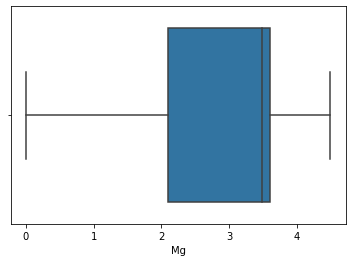

In [25]:
sns.boxplot(df.Mg)

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Al'>

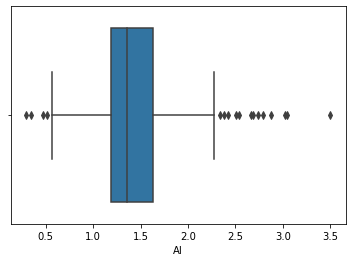

In [26]:
sns.boxplot(df['Al'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Si'>

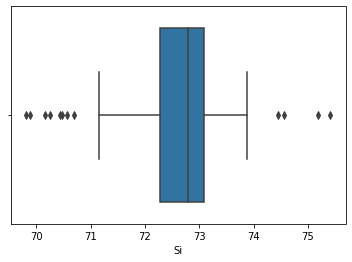

In [27]:
sns.boxplot(df['Si'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='K'>

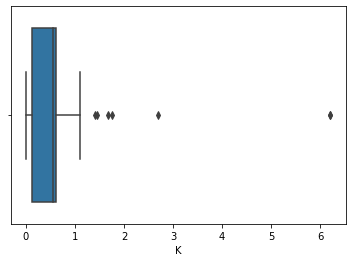

In [28]:
sns.boxplot(df['K'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ca'>

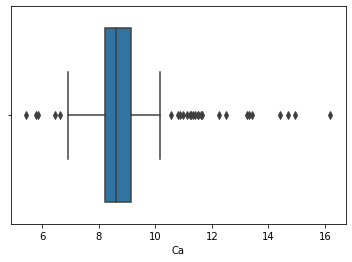

In [29]:
sns.boxplot(df['Ca'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ba'>

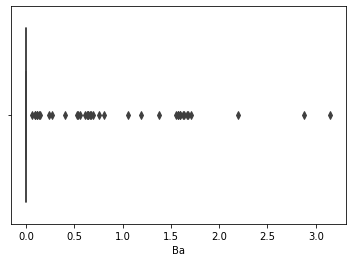

In [30]:
sns.boxplot(df['Ba'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fe'>

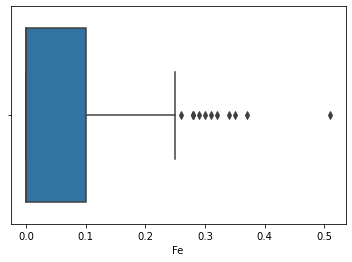

In [31]:
sns.boxplot(df['Fe'])

In [32]:
#Defining a custom function to get the number of outliers present as doing the steps again would just add extra lines 
def outlier_func(i):
    x=i.quantile(0.25)-((i.quantile(0.75)-i.quantile(0.25))*1.5)
    y=i.quantile(0.75)+((i.quantile(0.75)-i.quantile(0.25))*1.5)
    outliers= np.where(i > y, True, np.where(i < x, True, False))
    return(outliers)

In [33]:
sum(outlier_func(df.RI))

17

In [34]:
sum(outlier_func(df.Na))

7

In [35]:
sum(outlier_func(df.Al))

17

In [36]:
sum(outlier_func(df.Si))

12

In [37]:
sum(outlier_func(df.K))

7

In [38]:
sum(outlier_func(df.Ca))

27

In [39]:
sum(outlier_func(df.Ba))

38

In [40]:
sum(outlier_func(df.Fe))

12

In [41]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['RI'])

df.RI= winsor.fit_transform(df[['RI']])
sum(outlier_func(df.RI))

0

In [42]:
winsor=Winsorizer(capping_method='iqr',
                 tail='both',
                 fold=1.5,
                 variables=['Na'])
df.Na=winsor.fit_transform(df[['Na']])
sum(outlier_func(df.Na))

0

In [43]:
winsor=Winsorizer(capping_method='iqr',
                 tail='both',
                 fold=1.5,
                 variables=['Al'])
df.Al=winsor.fit_transform(df[['Al']])
sum(outlier_func(df.Al))

0

In [44]:
winsor=Winsorizer(capping_method='iqr',
                 tail='both',
                 fold=1.5,
                 variables=['Si'])
df.Si=winsor.fit_transform(df[['Si']])
sum(outlier_func(df.Si))

0

In [45]:
winsor=Winsorizer(capping_method='iqr',
                 tail='both',
                 fold=1.5,
                 variables=['K'])
df.K=winsor.fit_transform(df[['K']])
sum(outlier_func(df.K))

0

In [46]:
winsor=Winsorizer(capping_method='iqr',
                 tail='both',
                 fold=1.5,
                 variables=['Ca'])
df.Ca=winsor.fit_transform(df[['Ca']])
sum(outlier_func(df.Ca))

0

In [47]:
winsor=Winsorizer(capping_method='iqr',
                 tail='both',
                 fold=1.5,
                 variables=['Ba'])
df.Ba=winsor.fit_transform(df[['Ba']])
sum(outlier_func(df.Ba))

0

In [48]:
winsor=Winsorizer(capping_method='iqr',
                 tail='both',
                 fold=1.5,
                 variables=['Fe'])
df.Fe=winsor.fit_transform(df[['Fe']])
sum(outlier_func(df.Fe))

0

### MODEL BUILDING

Splitting the data in to dependent and independent variable.

In [49]:
X=df.drop(['Type'],axis=1)
Y=df['Type']

Splitting the X and Y data into train and test dataset using train_test_split function.

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0,stratify=Y)

Assigning the column names to cols.

In [51]:
cols=X.columns

Scaling the train and test data of the independent variables.

In [52]:
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [53]:
X_train=pd.DataFrame(X_train,columns=[cols])
X_train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.324219,0.941828,-0.777610,0.761905,-0.254296,-1.156250,0.821839,0.0,0.0
1,0.234375,1.351801,-0.747352,0.666667,-0.652921,-1.156250,0.752874,0.0,0.0
2,-0.023437,-0.487535,0.111952,-0.166667,0.213058,0.093750,-0.051724,0.0,0.0
3,0.355469,0.132964,-0.027231,0.214286,-0.817869,-0.093750,-0.005747,0.0,0.0
4,2.111328,0.653740,-0.347958,-0.404762,-2.343643,-0.989583,2.195402,0.0,0.0


In [54]:
X_test=pd.DataFrame(X_test,columns=[cols])
X_test.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.294011,-0.125714,-0.148760,0.112360,-0.476190,0.000000,0.446602,0.0,0.00
1,0.780399,1.520000,0.190083,-2.157303,-0.619048,-1.049505,0.456311,0.0,0.00
2,-0.221416,-0.125714,0.016529,0.269663,0.000000,0.237624,-0.407767,0.0,0.00
3,1.150635,0.125714,-1.181818,0.404494,-0.428571,-0.059406,1.009709,0.0,4.25
4,-0.294011,-0.228571,0.041322,-0.247191,0.190476,0.000000,-0.087379,0.0,2.50


Checking the best nearest neighbors by considering all the values from 1 to 50 odd numbers on test and train accuracies and plotting the accuracies of both train and test data

In [55]:
acc = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values

for i in range(1, 50, 2):
    neigh = KNeighborsClassifier(n_neighbors = i)
    neigh.fit(X_train, Y_train)
    train_acc = np.mean(neigh.predict(X_train) == Y_train)
    test_acc = np.mean(neigh.predict(X_test) == Y_test)
    acc.append([train_acc, test_acc])

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\lenny\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[n

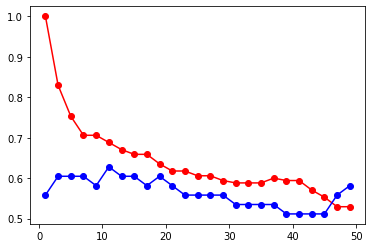

In [56]:
# train accuracy plot 
plt.plot(np.arange(1,50,2),[i[0] for i in acc],"ro-")

# test accuracy plot
plt.plot(np.arange(1,50,2),[i[1] for i in acc],"bo-")

Training the K-Nearest Neighbors Model on the train data.

In [57]:
knn=KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train,Y_train)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


KNeighborsClassifier(n_neighbors=19)

Evaluating the test data.

In [58]:
pred=knn.predict(X_test)
pred

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\lenny\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 1, 2, 2, 1, 2, 7, 2, 2, 1, 2, 7, 5, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 2, 7, 2, 7, 1, 1, 7, 1, 2, 2, 2, 1, 1, 2],
      dtype=int64)

Accuracy of test data

In [59]:
accuracy_score(Y_test,pred)

0.6046511627906976

In [60]:
pd.crosstab(Y_test, pred, rownames = ['Actual'], colnames= ['Predictions'])

Predictions,1,2,5,7
Actual,,,,
1,11,3,0,0
2,4,11,0,0
3,2,1,0,0
5,0,2,1,0
6,0,0,0,2
7,1,2,0,3


Evaluating the train data

In [61]:
pred_train=knn.predict(X_train)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\lenny\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy of the train data.

In [62]:
accuracy_score(Y_train,pred_train)

0.6352941176470588

In [63]:
pd.crosstab(Y_train,pred_train, rownames = ['Actual'], colnames= ['Predictions'])

Predictions,1,2,5,7
Actual,,,,
1,45,10,0,0
2,19,42,0,0
3,11,3,0,0
5,2,5,2,1
6,4,1,0,2
7,2,2,0,19


### CONCLUSIONS

This model is not good as the accuracies are less than 85% although it is not overfitting. So the best option is try another model.